In [1]:
## Visualize matrix powers applied to vectors for complex numbers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_powers(A, v0, K=20):
    """Compute sequence v_k = A^k v0 for k=0..K."""
    vs = [v0]
    Ak = np.eye(2, dtype=complex)
    for _ in range(K):
        Ak = Ak @ A
        vs.append(Ak @ v0)
    return np.array(vs)

In [3]:
def plot_spiral_case(A, v0, title, K=20, guide_points=200):
    """Plot evolution of v_k for given A."""
    vs = compute_powers(A, v0, K)
    eigvals = np.linalg.eigvals(A)

    # Convert to real plane
    X = vs[:, 0].real
    Y = vs[:, 1].real

    fig, ax = plt.subplots(figsize=(6, 6))

    # Draw arrows from origin to each vector tip
    max_len = np.max(np.sqrt(X**2 + Y**2))
    for k in range(len(X)):
        ax.arrow(0, 0, X[k], Y[k],
                 head_width=0.05 * max_len,
                 length_includes_head=True,
                 color=plt.cm.plasma(k / K), alpha=0.8)

    # Transform unit circle under A^T ---
    angles = np.linspace(0, 2*np.pi, guide_points)
    unit_circle = np.stack([np.cos(angles), np.sin(angles)], axis=1)
    # Apply A^n (continuous fractional powers for spiral shape)
    ts = np.linspace(0, K, 200)
    curve = []
    for t in ts:
        # Approximate continuous power by matrix fractional power via eigendecomposition
        eigvals, eigvecs = np.linalg.eig(A)
        D = np.diag(eigvals ** t)
        A_t = np.real_if_close(eigvecs @ D @ np.linalg.inv(eigvecs))
        curve.append(A_t @ v0)
    curve = np.array(curve)
    ax.plot(curve[:,0], curve[:,1], '--', color='gray', label='ellipse/spiral guide')

    ax.scatter(0, 0, color='black', s=50)
    ax.set_title(f"{title}\n|lambda|={abs(eigvals[0]):.2f}")
    ax.set_xlabel("Re")
    ax.set_ylabel("Im")
    ax.axis("equal")
    ax.grid(True)
    ax.legend()
    plt.show()

In [4]:
theta = np.pi / 8  # rotation angle
rot_mat = np.array([[np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]])

In [5]:
S = np.array([[2, 0], [1, 1]])
Sinv = .5*np.array([[1, 0], [-1, 2]])

In [6]:
cases = [
    ("|lambda| < 1  (decaying spiral)", np.array([
        [0.9*np.cos(theta), -0.9*np.sin(theta)],
        [0.9*np.sin(theta),  0.9*np.cos(theta)]
    ])),
    ("|lambda| = 1  (circle)", rot_mat),
    ("|lambda| = 1  (ellipse)", S @ rot_mat @ Sinv),
    ("|lambda| > 1  (expanding spiral)", np.array([
        [1.1*np.cos(theta), -1.1*np.sin(theta)],
        [1.1*np.sin(theta),  1.1*np.cos(theta)]
    ])),
]

In [7]:
# Initial vector
v0 = np.array([1.0, 1.0])

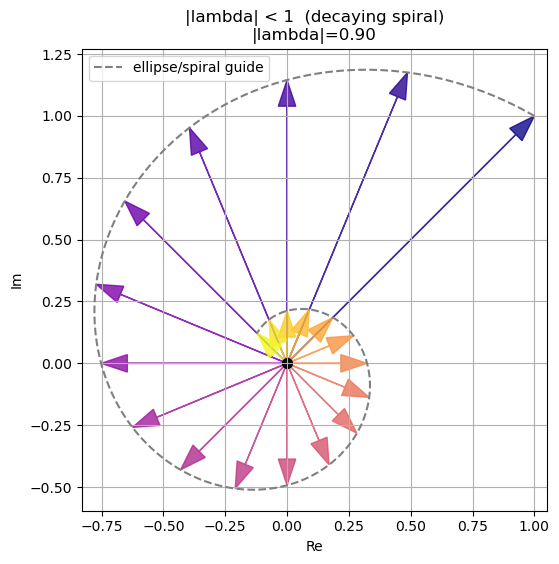

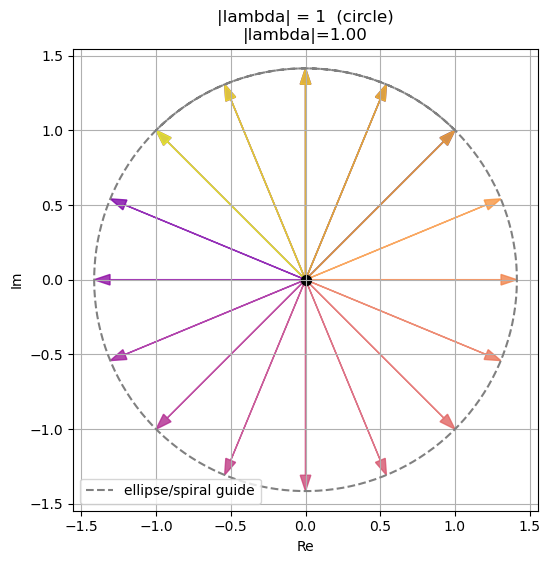

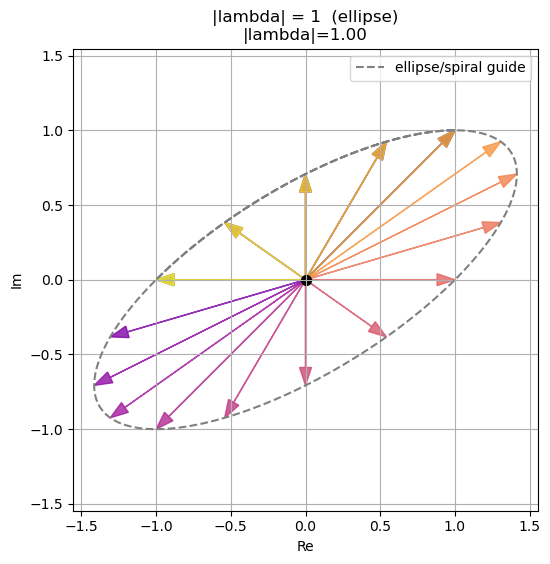

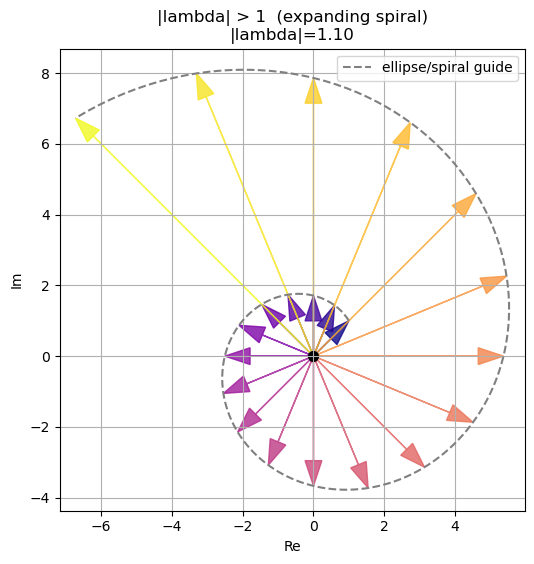

In [8]:
# Plot each case
for title, A in cases:
    plot_spiral_case(A, v0, title, K=20)